## Manim : Mathematical Animation Engine

Manim is an animation engine for explanatory math videos. It's used to create precise animations programmatically, as opposed to manually creating keyframes. It's particularly useful for creating teaching videos, as it allows for the creation of complex animations that can be used to explain difficult concepts in a visual way.

Here we will see how to use Manim to create animations.

In [1]:
from manim import *

## Understanding the Basics

In [3]:
class Scene1(Scene):        
    def construct(self):
        # width and height of the screen
        width = self.camera.frame_width
        height = self.camera.frame_height
        
        # Number plane with labels
        plane = NumberPlane(x_length=width, y_length=height)
        self.add(plane)

        # showing the origin
        origin = Dot(radius=0.1)
        self.add(origin)
        
        # A box at the origin
        box = Square(
            side_length=1,
            fill_color=BLUE,
            fill_opacity=0.5,
            stroke_color=BLUE,
            stroke_opacity=0.5
        )
        self.add(box)
        
        # Shifting is basically moving relative to the current position
        self.play(box.animate.shift(DOWN + RIGHT))
        self.play(box.animate.shift(2*UP))
        self.play(box.animate.shift(-2*RIGHT))
        self.play(box.animate.shift(2*DOWN))
        

In [97]:
%manim -qp -v WARNING Scene1

Manim Community v0.18.1

In [57]:
class Scene2(Scene):
    def construct(self):
        # Adding axes and the origin
        axes = Axes(
            x_length=5,
            y_length=5,
            x_range=[-5, 5, 1],
            y_range=[-5, 5, 1],
            axis_config={"color": BLUE},
            tips=False
        )
        axes.to_corner(UL)
        self.add(axes)
        
        # A circle at the origin that we will move to right down corner
        circle = Circle(radius=1, color=RED, fill_color=RED, fill_opacity=0.5)
        circle.to_corner(DR)
        self.play(DrawBorderThenFill(circle))
        self.play(circle.animate.move_to(axes.c2p(5, -5)))
        
        # Creating a triangle at the top right corner
        triangle = Triangle(color=GREEN, fill_color=GREEN, fill_opacity=0.5)
        triangle.to_corner(UR)
        self.play(DrawBorderThenFill(triangle))
        
        # Converting the circle to the triangle
        self.play(Transform(circle, triangle))
        
        # Move the triangle to origin
        self.play(circle.animate.move_to(axes.c2p(0, 0)))
        
        # Move the triangle to the origin of axis 
        self.play(triangle.animate.move_to(axes.c2p(0, 0)))

In [58]:
%manim -ql -v WARNING Scene2

Manim Community v0.18.1

In [93]:
class Scene3(Scene):
    def construct(self):
        # Rounded rectangle residing at the top left corner
        rectangle = RoundedRectangle(height=2, width=4, corner_radius=0.5, fill_color=BLUE, fill_opacity=0.3, color=BLUE)
        rectangle.to_corner(UL)
        self.play(DrawBorderThenFill(rectangle))
        
        # Math expression
        expression = MathTex(r"\frac{d}{dx} x^n = nx^{n-1}") # r is for raw string i.e no need to escape the backslashes
        expression.move_to(rectangle.get_center())
        self.play(Write(expression), run_time=2)
        
        # Add updater to the expression
        expression.add_updater(lambda m: m.move_to(rectangle.get_center()))
        
        # Move the rectangle to the bottom right corner
        self.play(rectangle.animate.to_corner(DR), run_time=2)
        
        # Move the rectangle to the bottom left corner
        self.play(rectangle.animate.to_corner(DL), run_time=2)
        
        # Move the rectangle to the top right corner
        self.play(rectangle.animate.to_corner(UR), run_time=2)
        
        # Clear the updater
        expression.clear_updaters()
        
        # Move the rectangle to the top left corner
        self.play(rectangle.animate.to_corner(UL), run_time=2)
        

In [94]:
%manim -ql -v WARNING Scene3

Manim Community v0.18.1

In [126]:
class Scene4(Scene):
    def construct(self):
        # Value tracker
        value = ValueTracker(1)
        
        # A circle that gets redraw everytime the value changes
        circle = always_redraw(lambda: Circle(radius=value.get_value(), color=RED, fill_color=RED, fill_opacity=0.5))
        
        # A line that gets redraw everytime the value changes
        line = always_redraw(lambda: Line().set_length(2 * PI * value.get_value()).next_to(circle, DOWN))
        
        # Adding the circle and line to the scene
        self.play(Create(circle), Create(line))
        
        # Wait for 2 seconds
        self.wait(2)
        
        # Updating the value
        self.play(value.animate.set_value(2), run_time=2)

In [127]:
%manim -ql -v WARNING Scene4

Manim Community v0.18.1

## Understanding the 2D Graphing 

In [32]:
class Scene5(Scene):
    def construct(self):
        # Adding axes
        axes = Axes(
            x_length=8,
            y_length=6,
            x_range=[0, 10, 1],
            y_range=[0, 8, 1],
            tips=False
        ).add_coordinates()
        
        # Move axes top left corner
        axes.to_corner(UL)
        
        # Add labels
        x_label = axes.get_x_axis_label("x")
        y_label = axes.get_y_axis_label("f(x)")

        # Add the axes and labels to the scene
        self.add(axes, x_label, y_label)
        
        # Drawing a curve using the axes
        curve = axes.plot(lambda x: x - 1, color=BLUE, x_range=[0, 10])
        self.add(curve)
        
        # Get area under the curve
        area = axes.get_area(curve, opacity=0.5)
        area.set_color_by_gradient(BLUE, GREEN)
        
        # Show the area under the curve
        self.add(area)
        
        # Horizontal line at x=3
        h_line = axes.get_horizontal_line(axes.input_to_graph_point(3, curve), color=RED)
        self.add(h_line)
        
        # Vertical line at y=3
        v_line = axes.get_vertical_line(axes.input_to_graph_point(3, curve), color=RED)
        self.add(v_line)
        
        # Plotting derivative of the curve
        derivative = axes.plot_derivative_graph(curve, color=ORANGE)
        self.add(derivative)
        
        # Plot the antidervative of the curve
        antiderivative = axes.plot_antiderivative_graph(curve, y_intercept=1, color=GREEN)
        self.add(antiderivative)

Manim Community v0.18.1

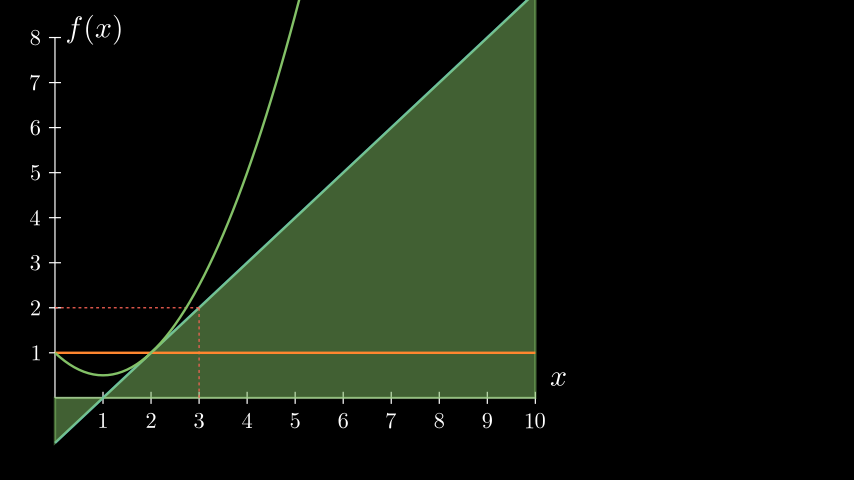

In [33]:
%manim -ql -v WARNING Scene5

In [47]:
class Scene6(Scene):
    def construct(self):
        # Number plane with labels
        plane = NumberPlane(x_length=6, y_length=6, x_range=[-5, 5, 1], y_range=[-5, 5, 1])
        plane.add_coordinates()
        
        # Add rectangle around the plane
        rect = Rectangle(width=7, height=7, color=BLUE, stroke_width=2)
        rect.move_to(plane.get_center())
        
        # Plot a graph using the plane
        graph = plane.plot(lambda x: x**2, color=RED)
        
        # Plot derivative of the graph
        derivative = plane.plot_derivative_graph(graph, color=GREEN)
        
        # Plot antiderivative of the graph
        antiderivative = plane.plot_antiderivative_graph(graph, y_intercept=1, color=ORANGE)
        
        # Adding labels corresponding to the graphs
        graph_label = MathTex(r"f(x) = x^2").to_corner(DL)
        derivative_label = MathTex(r"f'(x) = 2x").to_corner(DR)
        antiderivative_label = MathTex(r"F(x) = \frac{x^3}{3} + C").to_corner(UR)
        
        # Add everything to the scene
        self.add(plane, rect, graph, derivative, antiderivative, graph_label, derivative_label, antiderivative_label)

Manim Community v0.18.1

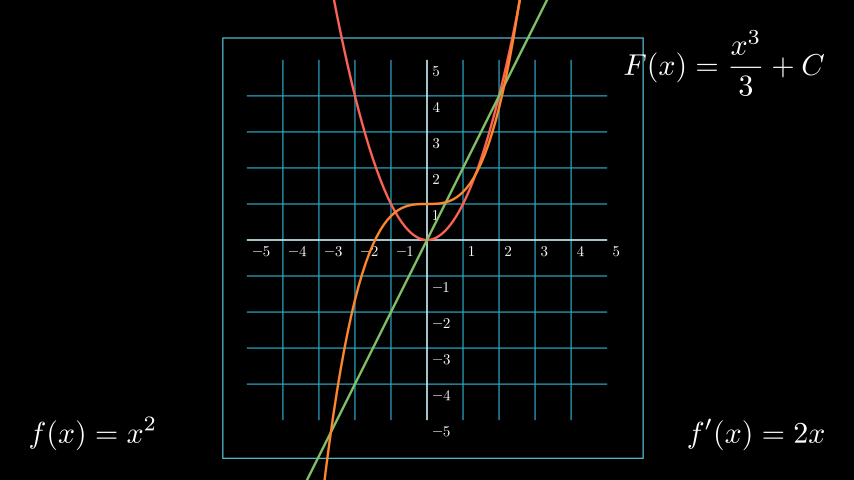

In [48]:
%manim -ql -v WARNING Scene6

In [87]:
class Scene7(Scene):
    def construct(self):
        # Polar plane with labels
        plane = PolarPlane(size=5, azimuth_units="PI radians")
        plane.add_coordinates()
        plane.to_edge(LEFT)
        
        # Add rectangle around the plane
        rect = Rectangle(width=6, height=6, color=BLUE, stroke_width=2)
        rect.move_to(plane.get_center())
        
        # Create polar graph
        graph = ParametricFunction(lambda t: plane.polar_to_point(t, t**2), color=RED, t_range=[0, 5])
        
        self.add(plane, rect, graph)

Manim Community v0.18.1

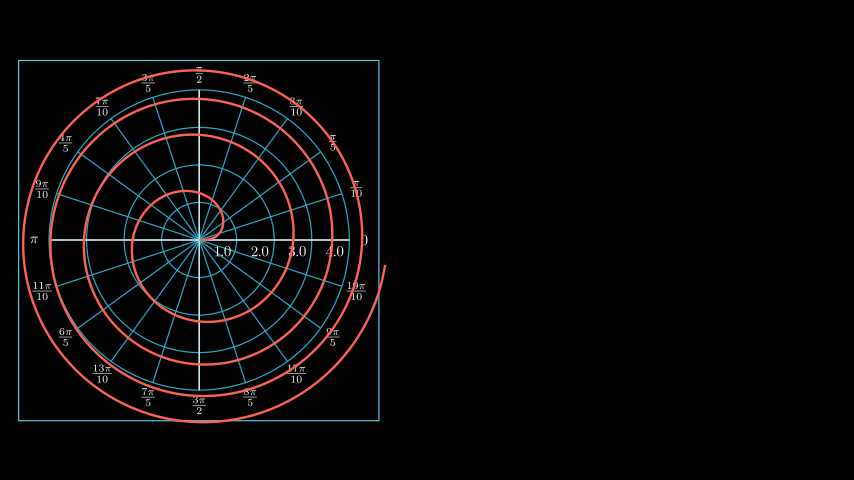

In [88]:
%manim -ql -v WARNING Scene7

## Understanding the 3D Graphing

In [22]:
class Scene8(ThreeDScene):
    def construct(self):
        # Creating a 3D axes
        axes = ThreeDAxes()
        axes.add_coordinates()
        axis_labels = axes.get_axis_labels()
        
        # Adding the axes to the scene
        self.add(axes, axis_labels)
        
        # Parabolloid graph
        graph = axes.plot_parametric_curve(lambda t: np.array([t, t**2, t**3]), t_range=[-2, 2], color=RED)
        self.add(graph)
        
        # By default theta = -90deg and phi = 0deg
        # Theta is for clockwise_path and phi is for up_down_path
        self.move_camera(theta = -45 * DEGREES, phi = 45 * DEGREES)
  
        # Get riemann rectangles
        riemann_rectangles = axes.get_riemann_rectangles(graph, x_range=[-2, 2], dx=0.1, input_sample_type="center")
        
        # Show the riemann rectangles
        self.play(Create(riemann_rectangles))
        
        # Ambient camera movement
        self.begin_ambient_camera_rotation(rate=0.1)
        
        # Wait for 2 seconds
        self.wait(2)
        
        # Stop the camera rotation
        self.stop_ambient_camera_rotation()
        
        # Creating a 3D surface
        surface = axes.plot_surface(lambda u, v: u**2 + v**2, u_range=[-2, 2], v_range=[-2, 2], color=BLUE)
        
        # Show the surface
        self.play(Create(surface))
        
        # Clear the riemann rectangles & graph from the scene
        self.remove(graph, riemann_rectangles)
        
        # Starting the camera rotation
        self.begin_ambient_camera_rotation(rate=0.1)
        
        # Wait for 6 seconds
        self.wait(6)
        
        # Stop the camera rotation
        self.stop_ambient_camera_rotation()
        
        # Move the camera to default position
        self.move_camera(theta = -90 * DEGREES, phi = 0 * DEGREES)

In [23]:
%manim -ql -v WARNING Scene8

Manim Community v0.18.1

## Understanding the Surface Revolutions

In [53]:
class Scene9(ThreeDScene):
    def construct(self):
        # Camera position
        # self.set_camera_orientation(phi=45 * DEGREES, theta=-45 * DEGREES)
        
        # Create a prism
        prism = Prism(dimensions=[1, 2, 3])
        prism.set_fill(color=BLUE, opacity=0.5)
        prism.set_stroke(color=BLUE, width=2)
        
        # Draw the prism
        self.play(DrawBorderThenFill(prism))
        # self.play(prism.animate.to_corner(UL))
        
        # Create 6 rectangles that will form the prism
        group = VGroup()
        group.add(Rectangle(height=1, width=2, color=BLUE, fill_color=BLUE, fill_opacity=0.5))
        group.add(Rectangle(height=1, width=3, color=BLUE, fill_color=BLUE, fill_opacity=0.5))
        group.add(Rectangle(height=2, width=3, color=BLUE, fill_color=BLUE, fill_opacity=0.5))
        group.add(Rectangle(height=1, width=2, color=BLUE, fill_color=BLUE, fill_opacity=0.5))
        group.add(Rectangle(height=1, width=3, color=BLUE, fill_color=BLUE, fill_opacity=0.5))
        group.add(Rectangle(height=2, width=3, color=BLUE, fill_color=BLUE, fill_opacity=0.5))
        
        # Arrange the rectangles in such a way that it looks like a flat prism
        group.arrange_in_grid(rows=2, cols=3, buff=0)
        
        # Draw the rectangles
        self.play(Create(group), run_time=6)
        
    

In [54]:
%manim -ql -v WARNING Scene9

Manim Community v0.18.1